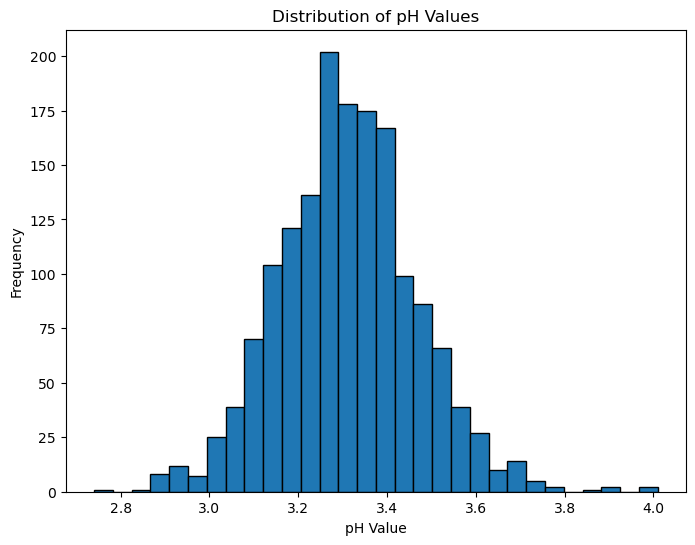

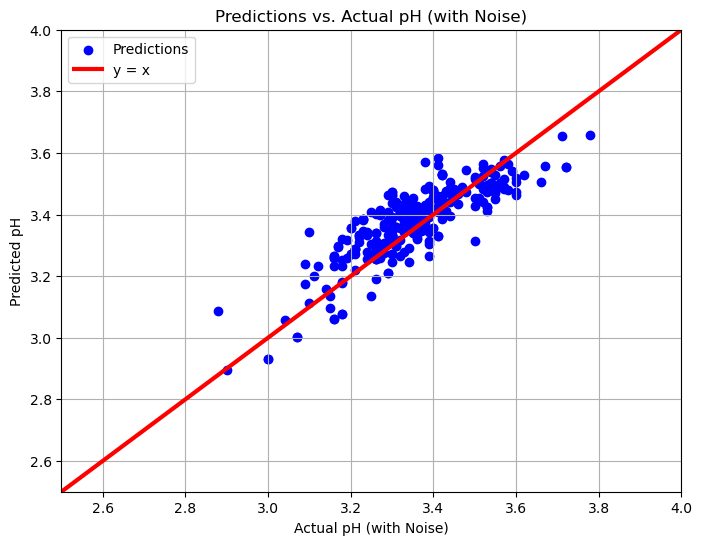

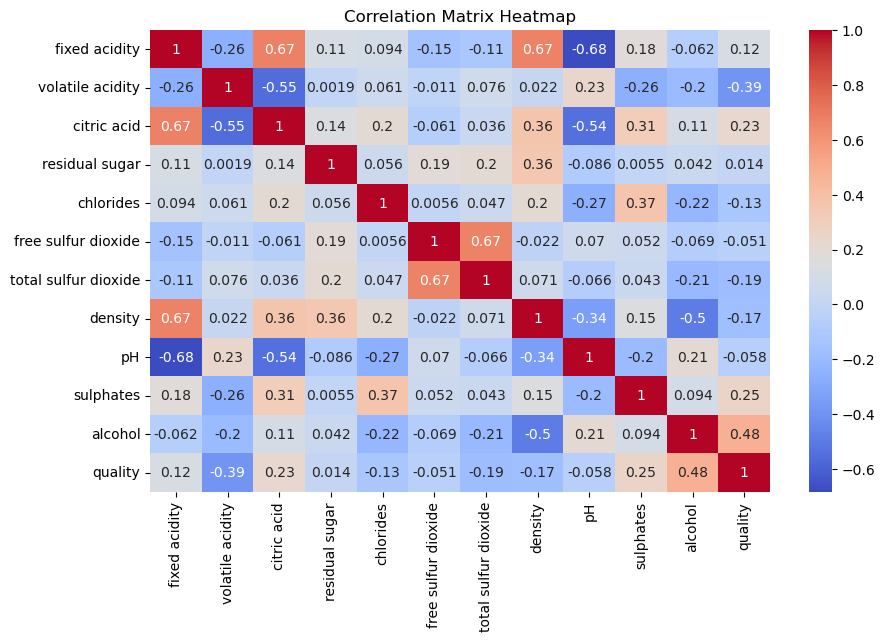

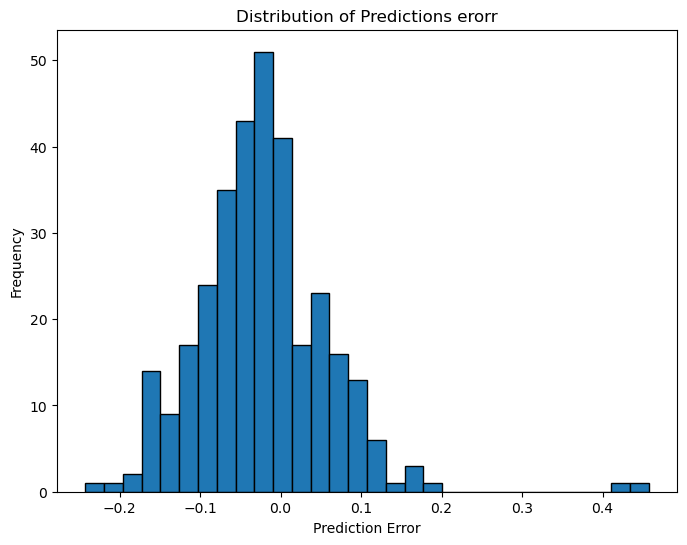

Mean Squared Error : 0.00710389269362751


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine quality dataset
wine_data = pd.read_csv("winequality-red.csv")

# Data Preprocessing
# Step 1: Handling missing values
wine_data = wine_data.dropna()

# Step 2: Feature selection (choose relevant features)
# In this example, we use all columns except 'pH' as features
target_column = 'pH'
features = wine_data.drop(columns=[target_column])

# Step 3: Data split
# We'll use 80% of the data for training and 20% for testing
total_data_points = len(wine_data)
train_ratio = 0.8
train_data_size = int(total_data_points * train_ratio)
test_data_size = total_data_points - train_data_size

# Split the data into training and test sets
X_train = features.iloc[:train_data_size].values
y_train = wine_data[target_column].iloc[:train_data_size].values
X_test = features.iloc[train_data_size:].values
y_test = wine_data[target_column].iloc[train_data_size:].values


# Calculate the weights for the linear regression model using the closed-form solution
X = np.concatenate((X_train, np.ones((train_data_size, 1))), axis=1)  # Add a column of ones for bias
y = y_train
X_transpose = X.transpose()
weights = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

# Calculate the mean squared error (MSE) on the test data with noise
X_test_with_bias = np.concatenate((X_test, np.ones((test_data_size, 1))), axis=1)
predictions = X_test_with_bias @ weights
errors = (y_test - predictions) ** 2
mse = np.mean(errors)

# Visualizations (can be retained for analysis)

# Visualization 1: Distribution of Wine pH
plt.figure(figsize=(8, 6))
plt.hist(wine_data['pH'], bins=30, edgecolor='black')
plt.xlabel("pH Value")
plt.ylabel("Frequency")
plt.title("Distribution of pH Values")
plt.show()

# Visualization 2: Predicted vs. Actual pH
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='Predictions')
plt.plot([2.5, 4.0], [2.5, 4.0], 'r', linewidth=3, label='y = x')
plt.xlabel("Actual pH ")
plt.ylabel("Predicted pH")
plt.legend()
plt.grid()
plt.title("Predictions vs. Actual pH")
plt.xlim([2.5, 4.0])
plt.ylim([2.5, 4.0])
plt.show()

# Visualization 3: Correlation Matrix Heatmap
correlation_matrix = wine_data.corr()
plt.figure(figsize=(10, 6))
plt.title("Correlation Matrix Heatmap")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# Visualization 4: Distribution of Prediction Errors
plt.figure(figsize=(8, 6))
plt.hist(y_test - predictions, bins=30, edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions erorr")
plt.show()

print("Mean Squared Error :", mse)


